I am creating the inductive dataset using only one part of the entire dataset

In [1]:
import pandas as pd
import numpy as np
import tarfile

seed = 1234

In [2]:
 # open file
file = tarfile.open(f'MSCallGraph_0.tar.gz')

    # extracting file
file.extractall('./')

file.close()
df = pd.read_csv(f'MSCallGraph_0.csv')
df=df.drop(['Unnamed: 0','timestamp','rpcid','interface','rt','traceid'],axis=1)
df = df.replace('(?)', np.NaN)
df = df.replace('', np.NaN)
df = df.replace('NAN', np.NaN)
df = df.dropna()
df = df.drop_duplicates()
df.nunique()

um         1474
rpctype       6
dm         7326
dtype: int64

In [3]:
df

,um,rpctype,dm
0,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
11,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,fd6d86bd0fd550e717c1fdb82a33190a9fef216d87d535...
20,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
26,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,84f9f68ef003a21288fffe8f9a09a5a29b05f4cc4229b8...
42,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0e...
...,...,...,...
6081607,0674d4c8b48f44a836019adff9dffe0cce2ee6e7b93ee0...,db,039ff41dc3636105ffd26b0ec675eec246a965e8102c77...
6081615,1cf86b19c487cc10ea3bb9623a319454029e040d0f4e9d...,db,bb61ac88608568ac2017c8559c1da973f4f94c7d1a958e...
6081625,2c52c868f36f3920d201fddda80c8062998ebc07ee2b85...,db,abb42d7303a4376befc681f9b4a765c6b6575de0df98ed...
6081642,1cf86b19c487cc10ea3bb9623a319454029e040d0f4e9d...,db,b0748973546ca26a9cbfe7802e52924291a76929a704a4...


In [4]:
triplets = []
entities = set()
relations = set()
for i in range(len(df)):
    head = df.iloc[i]['dm']
    tail = df.iloc[i]['um']
    rel = df.iloc[i]['rpctype']
    entities.add(head)
    entities.add(tail)
    relations.add(rel)
    triplets.append([head,rel,tail])

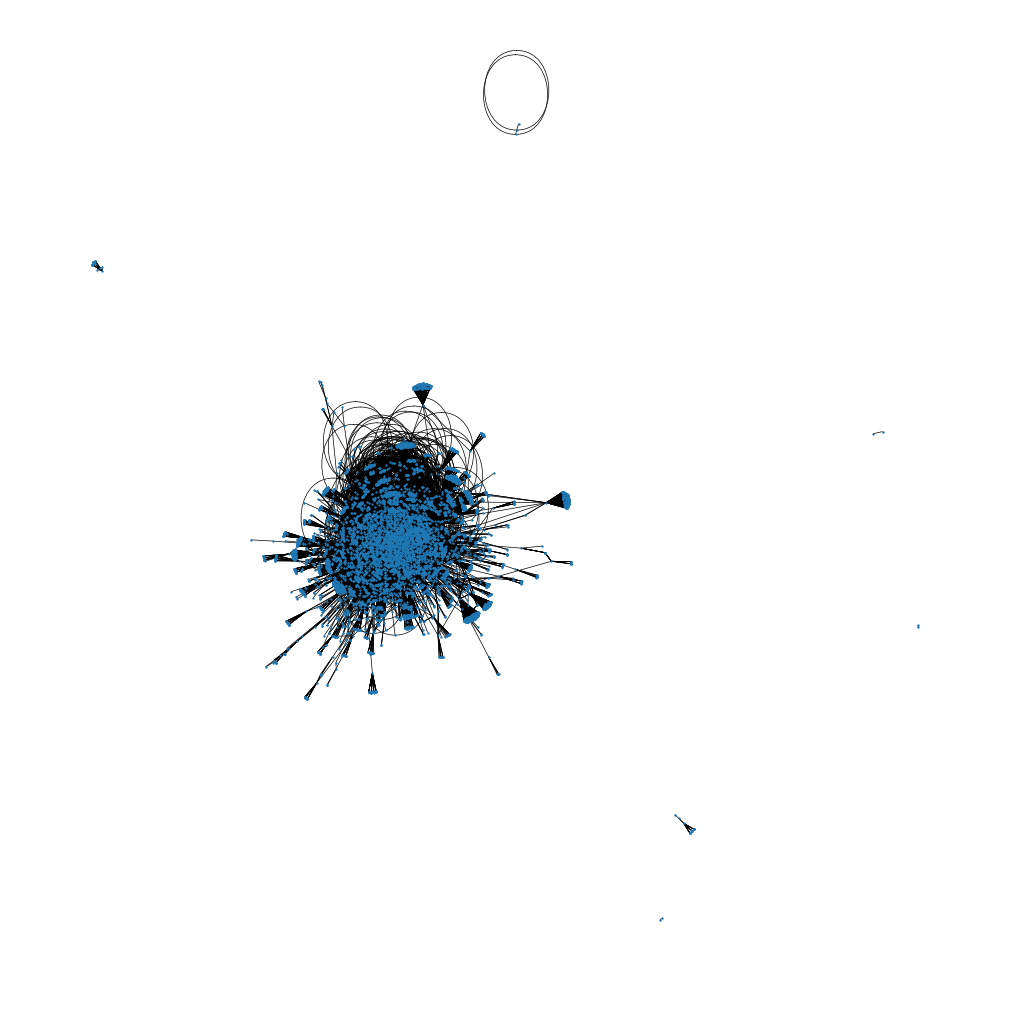

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph object
G = nx.Graph()

for entity in entities:
    G.add_node(entity)
for triplet in triplets:
    G.add_edge(triplet[0], triplet[2], label=triplet[1])

fig = plt.figure(1, figsize=(20, 20), dpi=50)

# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

In [6]:
import random


# shuffle the nodes randomly
nodes = list(G.nodes())
random.shuffle(nodes)

# split the nodes into two sets of approximately 64% and 36%
n = len(nodes)
m = int(n * 0.64)
nodes1 = set(nodes[:m])
nodes2 = set(nodes[m:])

# create subgraphs from the two sets of nodes
G1 = G.subgraph(nodes1)
G2 = G.subgraph(nodes2)

# print the sizes of the subgraphs
print(len(G1), len(G2))

4727 2659


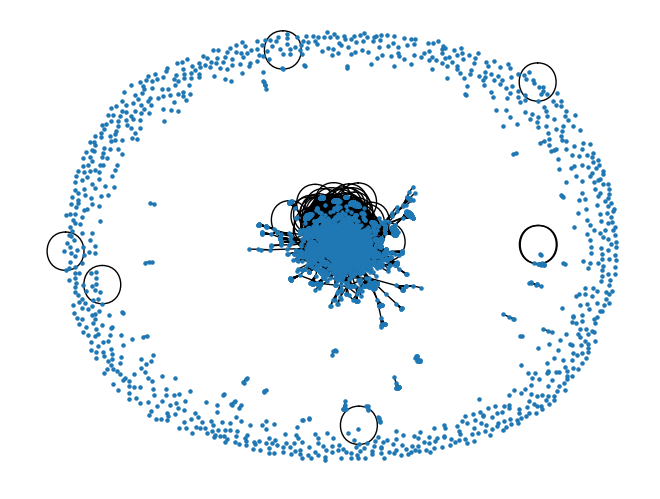

In [7]:
# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G1, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

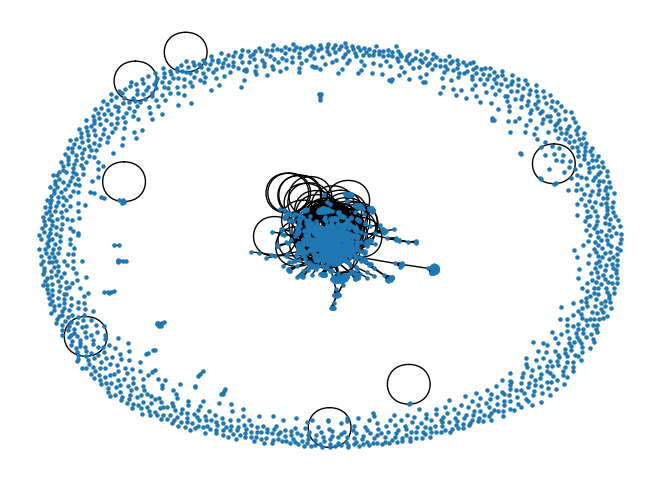

In [8]:
# Use NetworkX's built-in drawing function to visualize the graph
nx.draw(G2, node_size = 5)

# Import matplotlib library to show the graph
plt.show()

In [9]:
len(list(G1.edges(data=True)))

6601

In [10]:
len(list(G2.edges(data=True)))

1987

In [11]:
entities = list(set(df['dm']) | set(df['um']))
len(entities)

7386

In [12]:
relations = set(df['rpctype'])
len(relations)

6

In [13]:
G1_list = list(G1.nodes())
G2_list = list(G2.nodes())

Check that there are no overlapping nodes

In [14]:
assert len(set(G1_list) & set(G2_list)) == 0

In [15]:
transductive = df[(df['um'].isin(G1_list)) & (df['dm'].isin(G1_list))]
transductive

,um,rpctype,dm
0,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
11,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,fd6d86bd0fd550e717c1fdb82a33190a9fef216d87d535...
20,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
54,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,e0c38088a818a1f206daae6cdd8df07dae8afaf5f8b009...
94,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,14261188e152eee7862ecf8c1fde36129809a29c955020...
...,...,...,...
6073024,e86dd06b09052a1efb258207c1165e127a68965c0eba69...,db,265cfb0abc49dfff4e918a3c1e19b8f1cd8e80efb810f1...
6080565,1a46ec965872a5fd7c6e142f74941d99f3dd09fe71d0ce...,db,ea0fe3dad618da15ad7b1f0f41d5ebec8c3a7ad3f8caf0...
6081615,1cf86b19c487cc10ea3bb9623a319454029e040d0f4e9d...,db,bb61ac88608568ac2017c8559c1da973f4f94c7d1a958e...
6081642,1cf86b19c487cc10ea3bb9623a319454029e040d0f4e9d...,db,b0748973546ca26a9cbfe7802e52924291a76929a704a4...


In [16]:
inductive = df[(df['um'].isin(G2_list)) & (df['dm'].isin(G2_list))]
inductive

,um,rpctype,dm
64,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
65,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,userDefined,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
66,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
167,e6c95bef37d936ebb375bf135ded88c96eb9257a1d3d9d...,rpc,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
169,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,e6c95bef37d936ebb375bf135ded88c96eb9257a1d3d9d...
...,...,...,...
5977464,2c52c868f36f3920d201fddda80c8062998ebc07ee2b85...,db,88d3ede45ed983b71134a286189eaeae258e97150dfdf7...
6016555,aadffbefb785b68d3c8d60abc80d19e13fefef8fd0b76a...,db,de2c6120aacb37b363fe13319c9086fec78e300e081660...
6067315,b39889af09ab89f4a7918a534348e405b52260bf198a43...,rpc,80df1ad95e41fc8fdef7671b6dd89e6b7ee5c982038a07...
6080476,9a0f0dd3e278f678cfa3f874a7c74af8206de653ec0396...,rpc,5ef671a7799d52d75c5c1b87d3542b5619c0ca7c9b3d80...


Check that the remaining values are correct

In [17]:
assert len(transductive) == len(pd.merge(transductive,df))

In [18]:
assert len(inductive) == len(pd.merge(inductive,df))

In [19]:
train_df = transductive
train_df

,um,rpctype,dm
0,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,mc,b1dbd3a649a3cc790fa12573c9c1aa00988e07a8818a22...
11,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,fd6d86bd0fd550e717c1fdb82a33190a9fef216d87d535...
20,5cca70246befb1f4c9546d2912b9419dee54439218efa5...,userDefined,5cca70246befb1f4c9546d2912b9419dee54439218efa5...
54,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,e0c38088a818a1f206daae6cdd8df07dae8afaf5f8b009...
94,4ab265f54516248ee8873be7d6441912456ce17e84f399...,mc,14261188e152eee7862ecf8c1fde36129809a29c955020...
...,...,...,...
6073024,e86dd06b09052a1efb258207c1165e127a68965c0eba69...,db,265cfb0abc49dfff4e918a3c1e19b8f1cd8e80efb810f1...
6080565,1a46ec965872a5fd7c6e142f74941d99f3dd09fe71d0ce...,db,ea0fe3dad618da15ad7b1f0f41d5ebec8c3a7ad3f8caf0...
6081615,1cf86b19c487cc10ea3bb9623a319454029e040d0f4e9d...,db,bb61ac88608568ac2017c8559c1da973f4f94c7d1a958e...
6081642,1cf86b19c487cc10ea3bb9623a319454029e040d0f4e9d...,db,b0748973546ca26a9cbfe7802e52924291a76929a704a4...


In [20]:
len(set(inductive['dm']) | set(inductive['um']))

1299

In [21]:
inductive

,um,rpctype,dm
64,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
65,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,userDefined,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
66,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
167,e6c95bef37d936ebb375bf135ded88c96eb9257a1d3d9d...,rpc,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
169,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,e6c95bef37d936ebb375bf135ded88c96eb9257a1d3d9d...
...,...,...,...
5977464,2c52c868f36f3920d201fddda80c8062998ebc07ee2b85...,db,88d3ede45ed983b71134a286189eaeae258e97150dfdf7...
6016555,aadffbefb785b68d3c8d60abc80d19e13fefef8fd0b76a...,db,de2c6120aacb37b363fe13319c9086fec78e300e081660...
6067315,b39889af09ab89f4a7918a534348e405b52260bf198a43...,rpc,80df1ad95e41fc8fdef7671b6dd89e6b7ee5c982038a07...
6080476,9a0f0dd3e278f678cfa3f874a7c74af8206de653ec0396...,rpc,5ef671a7799d52d75c5c1b87d3542b5619c0ca7c9b3d80...


In [22]:
validation_df = inductive.sample(frac=0.44, random_state=seed)  # random sample
validation_df

,um,rpctype,dm
95139,b377d80cc43013d1b4691acb01ca3bcbf6021009653263...,mc,01d660afcfadafd587e20ec4c04ddbc7eb0de95643ba0e...
262564,d5ff4bc94b38b20e585d05c31f7fe2df2304de65d304c3...,mc,676ca482c56de84046ce1d0076abd6cdb0f25778d036db...
5880012,95a6f7f8345e2eca31ee74ddc19d547e7fc0f5c8e65772...,rpc,6d319dd546704c7470cccf51b9883b79d2439d2342cf0e...
771965,b39889af09ab89f4a7918a534348e405b52260bf198a43...,rpc,a9cd30c90ea19c56f4cd480ff0c31461a7934c0500c447...
1229402,4ba235f4b254662c470d96d1d2dffcc14633858798fb2c...,db,95692d737987502b54823042ea10bc7ae20c8646506b08...
...,...,...,...
5605089,4ba235f4b254662c470d96d1d2dffcc14633858798fb2c...,db,99f39cdc9db25e73bc9e84acd2a182e163992320d53806...
493729,81e90a12b97edb489895fe3949f9155c46de740841324c...,db,2fe4d430ba797610965825340257e06a742c37aaef15cd...
203531,1e5dd1f5843e50b9282fb99c58d8fe9c6e3d712d9e601a...,mc,676ca482c56de84046ce1d0076abd6cdb0f25778d036db...
797620,20539faa5e9e6271087ab706a900d1e854b8ebcfba9ab9...,db,62a84beeb57635f9967e55155d576532e04508232f1c49...


In [23]:
test_df = inductive.drop(validation_df.index)  # drop the sampled rows to get the second DataFram
test_df

,um,rpctype,dm
65,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,userDefined,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
66,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,091794afdcf1abbaf62404337ff72a38df96c5d8af8bd0...
167,e6c95bef37d936ebb375bf135ded88c96eb9257a1d3d9d...,rpc,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...
210,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,rpc,9a9e8613b6d7d1b573ba38dba19eec9c3cc460ab00cb49...
234,75e56c8fbb9336eb4dd40f5f609d5344203d374d73fd0b...,mc,d580d5be3ab3e37936ca1df82734ccfde6a884bfcdda77...
...,...,...,...
5908255,3dd6faf7046dcc9eda91fc9a83b4b650abf5bf729a9d89...,db,2f745b620925d6159851287309195a9159ee4cd537d32f...
5927770,999273f9b64da7c6a4322880380ba7ea9f959399753cda...,rpc,1cf15b5b8ce80d005ceb2d77ef34a226b178dc27fc3d93...
5927797,999273f9b64da7c6a4322880380ba7ea9f959399753cda...,mc,676ca482c56de84046ce1d0076abd6cdb0f25778d036db...
5977457,f952938c56b57228b3eb157b155c378e2736bef4ca0d13...,db,c86d87fbf68c9a7134d67088b567a6a1031fd4184421ec...


In [24]:
len(set(train_df['dm']) | set(train_df['um']))

3828

In [25]:
len(set(validation_df['dm']) | set(validation_df['um']))

742

In [26]:
len(set(test_df['dm']) | set(test_df['um']))

888

Check to see if there is test leakage

In [27]:
assert(len(pd.merge(train_df, validation_df))==0)

In [28]:
assert(len(pd.merge(test_df, validation_df))==0)

In [29]:
assert(len(pd.merge(train_df, test_df))==0)

In [30]:
assert(len(pd.merge(train_df, inductive))==0)

Check that all relations are present in the train set

In [31]:
assert(len(set(df['rpctype'])) == len(set(train_df['rpctype'])))

Check that there is no entities test leakage

In [32]:
train_entities = set(train_df['dm']) | set(train_df['um'])
assert(len(train_entities & (set(validation_df['dm']) | set(validation_df['um'])))==0)

In [33]:
assert(len(train_entities & (set(inductive['dm']) | set(inductive['um'])))==0)

In [34]:
assert(len(train_entities & (set(test_df['dm']) | set(test_df['um'])))==0)

In [35]:
test_df[(test_df['dm'].isin(train_entities)) | (test_df['um'].isin(train_entities))]

,um,rpctype,dm


In [36]:
inductive[(inductive['dm'].isin(train_entities)) | (inductive['um'].isin(train_entities))]

,um,rpctype,dm


In [37]:
def create_triplets(df):
    triplets = []
    for i in range(len(df)):
        head = df.iloc[i]['dm']
        tail = df.iloc[i]['um']
        rel = df.iloc[i]['rpctype']
        triplets.append([head,rel,tail])
    return triplets

In [38]:
import asposecells
import jpype
jpype.startJVM()

from asposecells.api import Workbook, FileFormatType

def create_tsv(triplets, file_name):


    # Create Workbook object.
    workbook = Workbook(FileFormatType.TSV)

    # Access the first worksheet of the workbook.
    worksheet = workbook.getWorksheets().get(0)

    # Get the desired cell(s) of the worksheet and input the value into the cell(s).


    i = 1
    for elem in triplets: 
        worksheet.getCells().get("A"+str(i)).putValue(elem[0])
        worksheet.getCells().get("B"+str(i)).putValue(elem[1])
        worksheet.getCells().get("C"+str(i)).putValue(elem[2])
        i+=1


    # Save the workbook as TSV file.
    workbook.save(file_name)


    file = open(file_name,'r')  
    lines = file.readlines()  
    file.close()
    file = open(file_name,'w')  
    lines = lines[:-1]
    file.writelines(lines)
    file.close()

In [39]:
datasets = [train_df, validation_df, test_df,inductive]
names = ["train", "validation","test","inference"]

In [40]:
for elem in zip(datasets,names):
    create_tsv(create_triplets(elem[0]),f"MSCallGraph_0_{elem[1]}_fully_inductive.tsv")
jpype.shutdownJVM()